https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html

In [1]:
from brian2 import *

In [2]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
sim_duration = 1000 * ms
eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''
neurons = NeuronGroup(N, eqs,
                      threshold='v>1',
                      reset='v=0',
                      refractory='5*ms',
                      method='exact')
neurons.v0 = 'i * v0_max / (N - 1)'
statemon = StateMonitor(neurons, 'v', record=True)
spikemon = SpikeMonitor(neurons, record=True)

run(sim_duration)

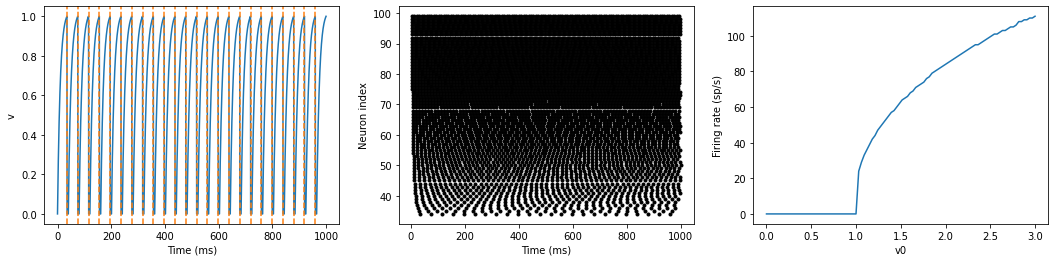

In [3]:
figure(figsize=(18, 4))
subplot(131)
plot(statemon.t / ms, statemon.v[34])
for spike_time in spikemon.t[np.where(spikemon.i == 34)[0]]:
    axvline(spike_time / ms, ls='--', c='C1')
xlabel('Time (ms)')
ylabel('v')
subplot(132)
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(133)
plot(neurons.v0, spikemon.count / sim_duration)
xlabel('v0')
ylabel('Firing rate (sp/s)')
show()

In [4]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
sim_duration = 350 * ms
sigma = 0.2
eqs = '''
dv/dt = (v0-v)/tau + sigma * xi * tau ** -0.5 : 1 (unless refractory)
v0 : 1
'''
neurons = NeuronGroup(N, eqs,
                      threshold='v>1',
                      reset='v=0',
                      refractory='5*ms',
                      method='euler')
neurons.v0 = 'i * v0_max / (N - 1)'
statemon = StateMonitor(neurons, 'v', record=True)
spikemon = SpikeMonitor(neurons, record=True)

run(sim_duration)

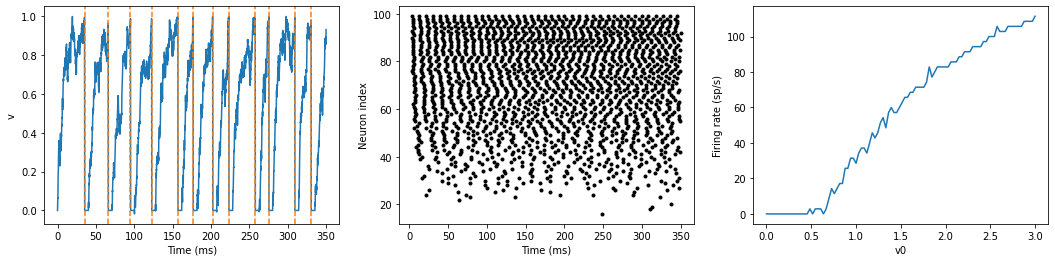

In [5]:
figure(figsize=(18, 4))
subplot(131)
plot(statemon.t / ms, statemon.v[34])
for spike_time in spikemon.t[np.where(spikemon.i == 34)[0]]:
    axvline(spike_time / ms, ls='--', c='C1')
xlabel('Time (ms)')
ylabel('v')
subplot(132)
plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(133)
plot(neurons.v0, spikemon.count / sim_duration)
xlabel('v0')
ylabel('Firing rate (sp/s)')
show()